<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
The t-distribution and t-tests
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 13</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Population:
- Mean $\mu$
- Standard deviation $\sigma$

Provide $N$ is large enough: 
 
- CLT give us ability to make some statements about sampling from population:


- Distribution of $\bar{X}$ of samples of size N: 
- Normal distribution with mean $\mu$ and std $\frac{\sigma}{\sqrt{N}}$

Or in terms of rescaled variables:
$$ Z = \frac{(\bar{X} - \mu)}{\sigma/\sqrt{N}} $$

follows the standardized normal distribution $N(0,1)$.

#### Often faced with a situation where

- $\mu$ is unkown: something to be estimated by sampling 
- $\sigma$ is unknown.

But as long as $N$ of sample used for mean estimation is large enough:

$$ Z = \frac{(\bar{X} - \mu)}{\sigma/\sqrt{N}} \approx \frac{(\bar{X} - \mu)}{s/\sqrt{N}}  $$ 

where $s^2$ is our sample variance:

$$ s^2 = \sum_{i=1}^{N}\frac{(X_i - \bar{X})^2}{N-1} $$


- And then apply CLT and use $Z$ for:
    - Confidence interval estimation
    - Hypothesis testing

#### But when N is small...

This doesn't really work. Why?

Sample-to-sample fluctuations in $s$ appreciable:
- Let's see this for samples of various sizes drawn from the standard normal.

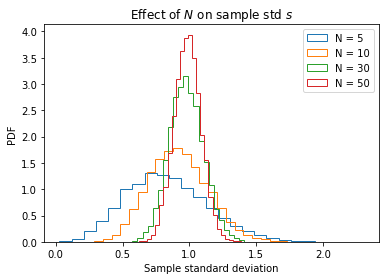

In [2]:
from scipy.stats import norm

N_list = [5,10, 30,50]
for N in N_list:
    s_list = [norm.rvs(loc = 0, scale = 1, size = N).std() for trial in range(10000)]
    plt.hist(s_list, bins = 25, density = True, histtype = 'step', label = "N = " + str(N))

plt.legend()
plt.xlabel('Sample standard deviation')
plt.ylabel('PDF')
plt.title('Effect of $N$ on sample std $s$')
plt.show()

The sample standard deviation fluctuation amplifies for smaller sample size $N < 30$

$$ \frac{(\bar{X} - \mu)}{s/\sqrt{N}} $$

- $\bar{X}$ is random variable.
- $s$ must be treated as random variable.


$$t = \frac{(\bar{X} - \mu)}{s/\sqrt{N}} $$


- **CLT cannot be invoked to see how t distributed**
    - $t$ statistic is a composite random variable. 
    - N is small

If **population** normally distributed (or have good reason to believe this):

- t follows another distribution: **the standardized t-distribution**.
- correction to normal because:
    - $\sigma$ uncertain.
    - $s$ for a given sample fluctuates a lot about unknown $\sigma$

Import t distribution in scipy:
- Assumes underlying population distribution samples is normal. 
- Sampling distribution of **means** of sample size N w/ unknown population std

In [3]:
from scipy.stats import t

- pdf needs degree of freedom argument (df):
    - loc = 0, scale = 1 (standardized) default
    - $df = N - 1$ for t-distribution.

In [4]:

# define t pdf for a few degrees of freedom and normal
x = np.linspace(-4,4,400)
t_distribution5 = t.pdf(x, loc = 0, df = 4) # N = 5
t_distribution10 = t.pdf(x, loc = 0, df = 9) # N = 10 
t_distribution20 = t.pdf(x, loc = 0, df = 19) # N = 20
norm_distribution = norm.pdf(x, loc = 0, scale = 1)

In [5]:
%%capture tdistplot

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x,t_distribution5, label = 't-distribution: df = 4' )
ax.plot(x,t_distribution10, label = 't-distribution: df = 9' )
ax.plot(x,t_distribution20, label = 't-distribution: df = 19' )
ax.plot(x,norm_distribution, label = 'normal')
ax.set_xlabel('t',  fontsize = 16)
ax.set_ylabel('PDF', fontsize = 16)
ax.set_title('t-distribution PDF approach to normal', fontsize = 18)
ax.legend()
plt.show()

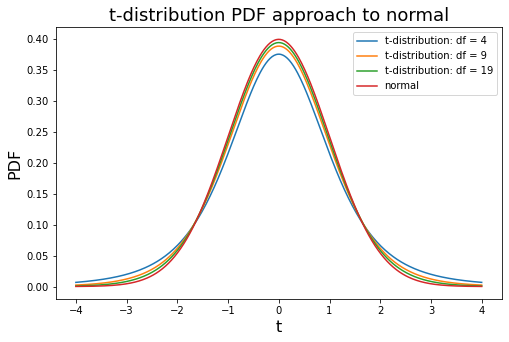

In [6]:
tdistplot()

Looks similar to normal: but tails are fatter.
- But area under tails:
    
    - central to hypothesis testing!
    - critical for acceptance/rejection region
        

#### Hypothesis testing means with t-tests

#### Same story as Z-test, different distribution/critical values.

 **$t$-test**:
 
 - Calculate the **$t$-statistic** using the sample's standard deviation $s$:
 $$\large t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
 - We calculate the p-value from the **$t$-distribution**

 **Scenario**

 - African savannah elephants: weights distributed normally around a mean of $9000$ lbs. 
 - Wildlife Conservation Society of Gabon: measured weights of $20$ African elephants in Gabon  

 Claim: Gabonese elephants are significantly different from general African population.



$H_0$: _There is no difference between the weight of Gabonese elephants and the general African elephant population_

$H_1$: _There is a difference between the weight of the Gabonese elephants and the general African elephant population_

Let's define our $\alpha$ to be $0.05$

#### What type of tailed test?

#### Our Gabonese elephant weight sample

Because the sample size is small, we need to use a one sample $t$-test. 

In [7]:
# We're given these values from the sample
gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601, 
        8559, 8228, 8474, 8708, 8128
])

In [8]:
print(f'Sample mean: {gab.mean():.1f}')
print(f'Sample std: {gab.std(ddof=1):.1f}')

Sample mean: 8562.0
Sample std: 296.2


Calculate t-statistic

In [9]:
N = len(gab)
s_n = gab.std(ddof = 1)/np.sqrt(N)
t_stat = (gab.mean() - 9000)/s_n

t_stat

-6.614120615780003

This is a two-sided test. Calculate the p-value.

In [10]:
t_abs = np.abs(t_stat)
p_value = t.cdf(-t_abs, df = N) + t.sf(t_abs, df = N)
p_value

1.9268591683793922e-06

Reject the null at $\alpha = 0.05$.

#### The easy way

In [11]:
# if this throws an error you need to upgrade your scipy version
result = stats.ttest_1samp(gab, 9000, alternative='two-sided')
t_stat, p_value = result
result

TypeError: ttest_1samp() got an unexpected keyword argument 'alternative'

### An Alternative Method in Making a Decision

We used SciPy above to calculate our $t$-value and ultimately our p-value from the $t$-distribution. 

Alternatively, we can convert our significance level $\alpha$ using the $t$-distribution to get our **critical value $t^*$**. We then can compare $t^*$ with our $t$-statistic to determine if it's significant.

In [ ]:
# Let's continue to assume our alpha is 0.05
x_bar = 8562
mu = 9000
sample_std = np.std(gab)
n = 20

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n))
t_stat

In [ ]:
# Calculate our t-critical value t*
stats.t.ppf(0.05, n-1)

We can again confidently reject our null hypothesis since the absolute value of our $t$-statistic is larger than that of our critical value $t^*$.

# Exercises

## Gotta Have My Coffee! ☕️

A coffee shop relocates from Manhattan to Brooklyn and wants to make sure that all lattes are consistent before and after their move. They buy a new machine and hire a new barista. In Manhattan, lattes are made with 4 oz of espresso. A random sample of 25 lattes made in their new store in Brooklyn shows a mean of 4.6 oz and standard deviation of 0.22 oz. Are their lattes different now that they've relocated to Brooklyn? Use a significance level of $\alpha = 0.01$.

**State the null and alternative hypotheses**

In [ ]:
# Your Answer Here

<details>
    <summary>Answer</summary>
Null: The Brooklyn lattes are not different in size from the Manhattan lattes. <br/>
Alternative: The Brooklyn lattes are different in size from the Manhattan lattes.
    </details>

**Perform the test.**

<details>
    <summary>Answer</summary>
    <code>t_stat = (4.6 - 4) / (0.22 / np.sqrt(25))
# This is a two-tailed test, so we want 1/2 of the 1% for
# the right tail and 1/2 for the left tail.
t_crit = stats.t.ppf(0.995, df=24)
print("t-statistic: ", t_stat)
print("critical t-value: ", t_crit)
print("p-value: ", stats.t(df=24).sf(t_stat))</code>
    </details>

**Make a decision**.

<details>
    <summary>Answer</summary>
    Because the p-value is lower than our threshold of 1% (or, equivalently, because our t-statistic is larger than the critical t-statistic), we should reject the null hypothesis. The Brooklyn lattes are different!
    </details>

## Gotta Have My Pants! 👖

I'm buying jeans from Pants-a-torium. I know nothing about their inventory other than prices after looking at some random jean prices: 

``` python
[20, 30, 30, 50, 75, 25, 30, 30, 40, 80]
```
However, I know that my typical pants store (Pants-R-Us) sells jeans at an average price of \\$58 with a standard deviation of \\$18. (Yes, I do descriptive statistics while I shop. Why do you ask?)

Should I go just to one store for a less expensive pair of jeans? I'm pretty apprehensive about my decision, so $\alpha = 0.1$.

**State the null and alternative hypotheses**

<details>
    <summary>Answer</summary>
    Null: The pants at Pants-a-torium are not cheaper than the pants at Pants-R-Us.
    Alternative: The pants at Pants-a-torium are cheaper than the pants at Pants-R-Us.
    </details>

**Perform the test.**

<details>
    <summary>Answer</summary>
    <code>pantsatorium = [20, 30, 30, 50, 75, 25, 30, 30, 40, 80]
stats.ttest_1samp(a=pantsatorium, popmean=58)</code>
</details>

**Make a decision.**

<details>
    <summary>Answer</summary>
The p-value is smaller than our critical level of 10%, so we'll reject the null!
    </details>

## Gotta Have My Food Delivered! 🚚

You measure the delivery times of ten different restaurants in two different neighborhoods. You want to know if restaurants in the different neighborhoods have the same delivery times. Set your significance threshold to 0.05. 

We measured this for neighborhood A: 

``` python
delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
```

For neighborhood B, someone already reported the values as a mean time of 26.8 minutes and a standard deviation of 2.6 minutes.


**State the null and alternative hypotheses.**

<details>
    <summary>Answer</summary>
Null: The delivery times for the restaurants in Neighborhood A are the same as the times for the restaurants in Neighborhood B. <br/>
Alternative: The delivery times for the restaurants in Neighborhood A are NOT the same as the times for the restaurants in  Neighborhood B.
    <details>

**Perform the test.**

<details>
    <summary>Answer</summary>
    This is a TWO-SAMPLE problem. So we'll use stats.ttest_ind_from_stats(). The two sets don't have exactly the same variance, so we'll perform Welch's test by setting the equal_var parameter to False. <br/>
    <code>delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
mean_A = np.mean(delivery_times_A)
std_A = np.std(delivery_times_A)
nobs_A = len(delivery_times_A)
mean_B = 26.8
std_B = 2.6
nobs_B = 10
stats.ttest_ind_from_stats(mean1=mean_A, std1=std_A, nobs1=nobs_A,
                          mean2=mean_B, std2=std_B, nobs2=nobs_B,
        equal_var=False)</code>
</details>

**Make a decision.**

<details>
    <summary>Answer</summary>
    The p-value is greater than our threshold value of 5%, so we can't reject the null hypothesis that the two neighborhoods have the same restaurant delivery times.
    </details>

# Level Up: More practice problems!

1. A rental car company claims the mean time to rent a car on their website is 60 seconds with a standard deviation of 30 seconds. A random sample of 36 customers attempted to rent a car on the website. The mean time to rent was 75 seconds. Is this enough evidence to contradict the company's claim at a significance level of $\alpha = 0.05$? 

Null hypothesis:

Alternative hypothesis:


<details>
    <summary>Answer</summary>
    Null: The customers' rent time is not different from what the company claims.
    Alternative: The customers' rent time is different from what the company claims.
    </details>

In [ ]:
# one-sample z-test 


<details>
    <summary>Answer</summary>
<code>z_stat = (75 - 60) / (30 / np.sqrt(36))
stats.norm.cdf(z_stat)</code>
    </details>

Reject?:

<details>
    <summary>Answer</summary>
    Yes, reject the null hypothesis! The p-value is less than our threshold of 5%.
    </details>

2. Consider the gain in weight (in grams) of 19 female rats between 28 and 84 days after birth. 

Twelve rats were fed on a high-protein diet and seven rats were fed on a low-protein diet.

``` python
high_protein = [134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123]
low_protein = [70, 118, 101, 85, 107, 132, 94]
```

Is there any difference in the weight gain of rats fed on high protein diet vs low protein diet? It's OK to assume equal sample variances. 

Null and alternative hypotheses? 

> null: 

> alternative: 

<details>
    <summary>Answer</summary>
    Null: The rats with the high-protein diet and the rats with the low-protein diet had the same weight gain. <br/>
    Alternative: The rats with the high-protein diet and the rats with the low-protein diet did not have the same weight gain.
    </details>

What kind of test should we perform and why? 

> Test:

<details>
    <summary>Answer</summary>
    Two-sample two-tailed t-test, since we have small sample sizes. See the Level-Up section below!
    </details>

Perform the test. Do we reject the null hypothesis?

<details>
    <summary>Answer</summary>
<code>high_protein = [134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123]
low_protein = [70, 118, 101, 85, 107, 132, 94]
stats.ttest_ind(a=high_protein, b=low_protein)</code>

We fail to reject the null hypothesis at a significance level of $\alpha = 0.05$.
    </details>

**What if we wanted to test if the rats who ate a high-protein diet gained *more* weight than those who ate a low-protein diet?**

Null:

alternative:

<details>
    <summary>Answer</summary>
    Null: The rats with the high-protein diet did not gain more weight than the rats with the low-protein diet. <br/>
    Alternative: The rats with the high-protein diet gained more weight than the rats with the low-protein diet.

Kind of test? 

<details>
    <summary>Answer</summary>
    Now we need a two-sample ONE-tailed test.
    </details>

Critical test statistic value? 

<details>
    <summary>Answer</summary>
    <code>h_bar = np.mean(high_protein)
l_bar = np.mean(low_protein)
h_df = len(high_protein) - 1
l_df = len(low_protein) - 1
pooled_var = (h_df*np.var(high_protein) + l_df*np.var(low_protein)) / (h_df + l_df)
t_stat = (h_bar - l_bar) / np.sqrt(pooled_var * (1/len(high_protein) + 1/len(low_protein)))
t_stat</code>
    </details>

Can we reject?

<details>
    <summary>Answer</summary>
    <code>stats.t(df=h_df+l_df).cdf(t_stat)</code>
    
    Yes, we can reject the null hypothesis!
    </details>

# Level Up:  Two-sample $t$-tests

Sometimes, we are interested in determining whether two population means are equal. In this case, we use two-sample $t$-tests.

There are two types of two-sample t-tests: **paired** and **independent** (unpaired) tests. 

What's the difference?  

**Paired tests**: How is a sample affected by a certain treatment? The individuals in the sample remain the same and you compare how they change after treatment. 

**Independent tests**: When we compare two different, unrelated samples to each other, we use an independent (or unpaired) two-sample t-test.

The test statistic for an unpaired two-sample t-test is slightly different than the test statistic for the one-sample $t$-test. 

Assuming equal variances, the test statistic for a two-sample $t$-test is given by: 

$$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$$

where $s^2$ is the pooled sample variance, 

$$ s^2 = \frac{\sum_{i=1}^{n_1} \left(x_i - \bar{x_1}\right)^2 + \sum_{j=1}^{n_2} \left(x_j - \bar{x_2}\right)^2 }{n_1 + n_2 - 2} $$

Here, $n_1$ is the sample size of sample 1 and $n_2$ is the sample size of sample 2. 

An independent two-sample $t$-test for samples of size $n_1$ and $n_2$ has $(n_1 + n_2 - 2)$ degrees of freedom. 

Now let's say we want to compare our Gabonese elephants to a sample of elephants from Kenya. 

In [ ]:
ken = [8762, 8880, 8743, 8901,
        8252, 8966, 8369, 9001,
         8857, 8147, 8927, 9005,
         9083, 8477, 8760, 8915,
         8927, 8829, 8579, 9002]


print(np.std(ken))
print(np.std(gab))

In [ ]:
# so

x_1 = np.mean(gab)
x_2 = np.mean(ken)
s_1_2 = np.var(gab, ddof = 1)
s_2_2 = np.var(ken, ddof = 1)
n_1 = len(gab)
n_2 = len(ken)
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)

t = (x_1 - x_2)/np.sqrt(s_p_2*(1/n_1 + 1/n_2))
t

In [ ]:
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)
s_p_2

In [ ]:
print(s_1_2, s_2_2 )

In [ ]:
stats.ttest_ind(gab, ken, equal_var=False)